Current State: 13, Chosen Action: 3
Current State: 16, Chosen Action: 3
Current State: 19, Chosen Action: 3
Current State: 22, Chosen Action: 3
Current State: 25, Chosen Action: 3


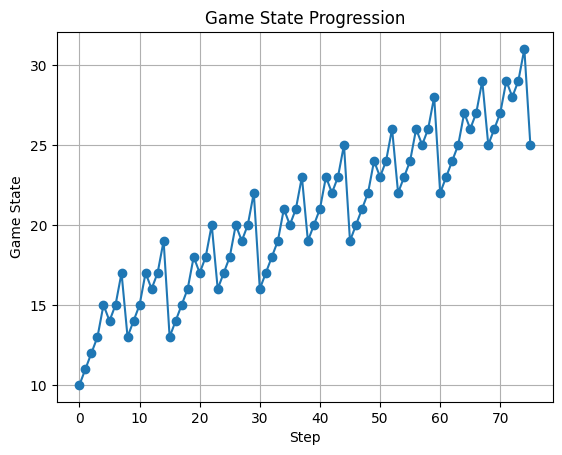

In [7]:
import random
import matplotlib.pyplot as plt

class Game:
    def __init__(self, initial_state):
        self.state = initial_state
        self.states_history = [initial_state]  # Store the history of states

    def get_possible_actions(self):
        return [1, 3]  # Different possible actions: moving +1 or +3

    def perform_action(self, action):
        # Perform the action by updating the state and storing it in the history
        self.state += action
        self.states_history.append(self.state)

class Heuristics:
    def evaluate(self, state):
        # A simple heuristic that maximizes the state value
        return state

class Agent:
    def __init__(self, game, heuristics):
        self.game = game
        self.heuristics = heuristics

    def heuristic_search(self, state, depth):
        if depth == 0:
            return self.heuristics.evaluate(state), None

        best_action = None
        best_value = float('-inf')

        possible_actions = self.game.get_possible_actions()
        if not possible_actions:
            return self.heuristics.evaluate(state), None

        for action in possible_actions:
            self.game.perform_action(action)
            value, _ = self.heuristic_search(self.game.state, depth - 1)

            if value > best_value:
                best_value = value
                best_action = action

            # Revert the state back to its previous value
            self.game.state -= action

        return best_value, best_action

    def choose_action(self, depth):
        _, best_action = self.heuristic_search(self.game.state, depth)
        return best_action

# Example usage with a different initial state:
game = Game(initial_state=10)
heuristics = Heuristics()
agent = Agent(game, heuristics)

current_state = game.state
for _ in range(5):
    action = agent.choose_action(depth=3)
    game.perform_action(action)
    print(f"Current State: {game.state}, Chosen Action: {action}")

# Plot the results
plt.plot(range(len(game.states_history)), game.states_history, marker='o')
plt.xlabel('Step')
plt.ylabel('Game State')
plt.title('Game State Progression')
plt.grid(True)
plt.show()


In [8]:
import heapq
from collections import deque

class Game:
    def __init__(self, game_model):
        self.game_model = game_model
        self.start = game_model['start']
        self.end = game_model['end']

    def is_valid(self, x, y):
        # Check if the move is within the game boundaries and not blocked
        return 0 <= x < len(self.game_model['grid']) and 0 <= y < len(self.game_model['grid'][0]) and self.game_model['grid'][x][y] != 1

    def a_star_search(self):
        open_list = [(0, self.start)]
        came_from = {}  # To track the parent of each cell
        g_score = {self.start: 0}
        f_score = {self.start: self.heuristic(self.start)}

        while open_list:
            _, current = heapq.heappop(open_list)

            if current == self.end:
                return self.reconstruct_path(current, came_from)

            for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
                neighbor = (current[0] + dx, current[1] + dy)
                tentative_g_score = g_score[current] + 1

                if self.is_valid(*neighbor) and tentative_g_score < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + self.heuristic(neighbor)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

        return None

    def bfs_search(self):
        queue = deque([(self.start, [])])
        visited = set()

        while queue:
            current, path = queue.popleft()
            visited.add(current)

            if current == self.end:
                return path + [current]

            for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
                neighbor = (current[0] + dx, current[1] + dy)

                if self.is_valid(*neighbor) and neighbor not in visited:
                    queue.append((neighbor, path + [current]))

        return None

    def dfs_search(self):
        stack = [(self.start, [])]
        visited = set()

        while stack:
            current, path = stack.pop()
            visited.add(current)

            if current == self.end:
                return path + [current]

            for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
                neighbor = (current[0] + dx, current[1] + dy)

                if self.is_valid(*neighbor) and neighbor not in visited:
                    stack.append((neighbor, path + [current]))

        return None

    def heuristic(self, point):
        # Simple Manhattan distance heuristic
        return abs(point[0] - self.end[0]) + abs(point[1] - self.end[1])

    def reconstruct_path(self, current, came_from):
        path = []
        while current != self.start:
            path.insert(0, current)
            current = came_from[current]
        return path

# Example usage
game_model = {
    'grid': [[0, 0, 0, 0],
             [1, 1, 0, 1],
             [0, 0, 0, 0],
             [0, 1, 1, 0]],
    'start': (0, 0),
    'end': (3, 3)
}

game = Game(game_model)

a_star_path = game.a_star_search()
print("A* Path:", a_star_path)

bfs_path = game.bfs_search()
print("BFS Path:", bfs_path)

dfs_path = game.dfs_search()
print("DFS Path:", dfs_path)


A* Path: [(0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (3, 3)]
BFS Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (3, 3)]
DFS Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (3, 3)]


In [9]:
import time

# Function to measure the execution time of a search algorithm
def measure_execution_time(search_func):
    start_time = time.time()
    result = search_func()
    end_time = time.time()
    return result, end_time - start_time

# Game model
game_model = {
    'grid': [[0, 0, 0, 0],
             [1, 1, 0, 1],
             [0, 0, 0, 0],
             [0, 1, 1, 0]],
    'start': (0, 0),
    'end': (3, 3)
}

game = Game(game_model)

# Measure execution time and path length for A* search
a_star_path, a_star_time = measure_execution_time(game.a_star_search)
a_star_path_length = len(a_star_path) if a_star_path else float('inf')

# Measure execution time and path length for BFS
bfs_path, bfs_time = measure_execution_time(game.bfs_search)
bfs_path_length = len(bfs_path) if bfs_path else float('inf')

# Measure execution time and path length for DFS
dfs_path, dfs_time = measure_execution_time(game.dfs_search)
dfs_path_length = len(dfs_path) if dfs_path else float('inf')

# Print the results
print("A* Search:")
print("Execution Time:", a_star_time, "seconds")
print("Path Length:", a_star_path_length)
print("Path:", a_star_path)

print("\nBFS:")
print("Execution Time:", bfs_time, "seconds")
print("Path Length:", bfs_path_length)
print("Path:", bfs_path)

print("\nDFS:")
print("Execution Time:", dfs_time, "seconds")
print("Path Length:", dfs_path_length)
print("Path:", dfs_path)

# Determine the best algorithm based on path length
best_algorithm = None
if a_star_path_length < bfs_path_length and a_star_path_length < dfs_path_length:
    best_algorithm = "A* Search"
elif bfs_path_length < dfs_path_length:
    best_algorithm = "BFS"
else:
    best_algorithm = "DFS"

print("\nThe best search algorithm is:", best_algorithm)


A* Search:
Execution Time: 5.53131103515625e-05 seconds
Path Length: 6
Path: [(0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (3, 3)]

BFS:
Execution Time: 3.6716461181640625e-05 seconds
Path Length: 7
Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (3, 3)]

DFS:
Execution Time: 3.4809112548828125e-05 seconds
Path Length: 7
Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (3, 3)]

The best search algorithm is: A* Search


A* Search:
Execution Time: 4.76837158203125e-07 seconds
Path Length: inf
Path: None

BFS:
Execution Time: 4.76837158203125e-07 seconds
Path Length: inf
Path: None

DFS:
Execution Time: 7.152557373046875e-07 seconds
Path Length: inf
Path: None

The best search algorithm is: DFS

The best search algorithm is: DFS


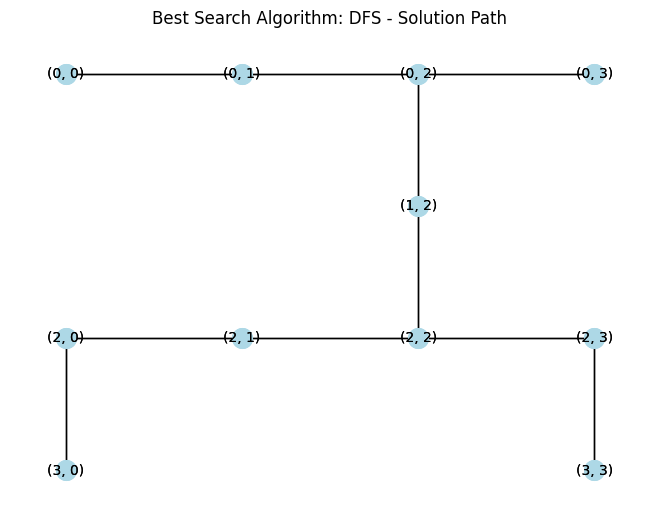

In [10]:
import time
import networkx as nx
import matplotlib.pyplot as plt

# Define the Game class
class Game:
    def __init__(self, model):
        self.grid = model['grid']
        self.start = model['start']
        self.end = model['end']
        self.rows = len(self.grid)
        self.cols = len(self.grid[0])

    def is_valid(self, x, y):
        return 0 <= x < self.rows and 0 <= y < self.cols and self.grid[x][y] == 0

    def a_star_search(self):
        # Implement A* search algorithm
        pass

    def bfs_search(self):
        # Implement BFS search algorithm
        pass

    def dfs_search(self):
        # Implement DFS search algorithm
        pass

# Function to measure the execution time of a search algorithm
def measure_execution_time(search_func):
    start_time = time.time()
    result = search_func()
    end_time = time.time()
    return result, end_time - start_time

# Game model
game_model = {
    'grid': [[0, 0, 0, 0],
             [1, 1, 0, 1],
             [0, 0, 0, 0],
             [0, 1, 1, 0]],
    'start': (0, 0),
    'end': (3, 3)
}

# Create a Game instance
game = Game(game_model)

# Measure execution time and path length for A* search
a_star_path, a_star_time = measure_execution_time(game.a_star_search)
a_star_path_length = len(a_star_path) if a_star_path else float('inf')

# Measure execution time and path length for BFS
bfs_path, bfs_time = measure_execution_time(game.bfs_search)
bfs_path_length = len(bfs_path) if bfs_path else float('inf')

# Measure execution time and path length for DFS
dfs_path, dfs_time = measure_execution_time(game.dfs_search)
dfs_path_length = len(dfs_path) if dfs_path else float('inf')

# Print the results
print("A* Search:")
print("Execution Time:", a_star_time, "seconds")
print("Path Length:", a_star_path_length)
print("Path:", a_star_path)

print("\nBFS:")
print("Execution Time:", bfs_time, "seconds")
print("Path Length:", bfs_path_length)
print("Path:", bfs_path)

print("\nDFS:")
print("Execution Time:", dfs_time, "seconds")
print("Path Length:", dfs_path_length)
print("Path:", dfs_path)

# Determine the best algorithm based on path length
best_algorithm = None
if a_star_path_length < bfs_path_length and a_star_path_length < dfs_path_length:
    best_algorithm = "A* Search"
elif bfs_path_length < dfs_path_length:
    best_algorithm = "BFS"
else:
    best_algorithm = "DFS"

print("\nThe best search algorithm is:", best_algorithm)

# Create a graph to visualize the game grid
G = nx.Graph()

for i in range(game.rows):
    for j in range(game.cols):
        if game.grid[i][j] == 0:
            G.add_node((i, j))

for i in range(game.rows):
    for j in range(game.cols):
        if game.grid[i][j] == 0:
            for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                if game.is_valid(i + dx, j + dy):
                    G.add_edge((i, j), (i + dx, j + dy))

# Draw the game grid
pos = {(i, j): (j, -i) for i in range(game.rows) for j in range(game.cols)}
nx.draw(G, pos, with_labels=True, node_size=200, node_color="lightblue", font_size=10, font_color="black")

# ... (Previous code remains the same)

# Determine the best algorithm based on path length
best_algorithm = None
best_path = None

if a_star_path_length < bfs_path_length and a_star_path_length < dfs_path_length:
    best_algorithm = "A* Search"
    best_path = a_star_path
elif bfs_path_length < dfs_path_length:
    best_algorithm = "BFS"
    best_path = bfs_path
else:
    best_algorithm = "DFS"
    best_path = dfs_path

print("\nThe best search algorithm is:", best_algorithm)

# Create a graph to visualize the game grid
G = nx.Graph()

for i in range(game.rows):
    for j in range(game.cols):
        if game.grid[i][j] == 0:
            G.add_node((i, j))

for i in range(game.rows):
    for j in range(game.cols):
        if game.grid[i][j] == 0:
            for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                if game.is_valid(i + dx, j + dy):
                    G.add_edge((i, j), (i + dx, j + dy))

# Draw the game grid
pos = {(i, j): (j, -i) for i in range(game.rows) for j in range(game.cols)}
nx.draw(G, pos, with_labels=True, node_size=200, node_color="lightblue", font_size=10, font_color="black")

# Draw the path found by the best algorithm
if best_path is not None:
    path_edges = [(best_path[i], best_path[i + 1]) for i in range(len(best_path) - 1)]
    nx.draw(G, pos, edgelist=path_edges, width=2, edge_color="red")

plt.title(f"Best Search Algorithm: {best_algorithm} - Solution Path")
plt.show()


Experiment 1 - Initial State: [1, 2, 3, 0, 4, 5, 6, 7, 8]


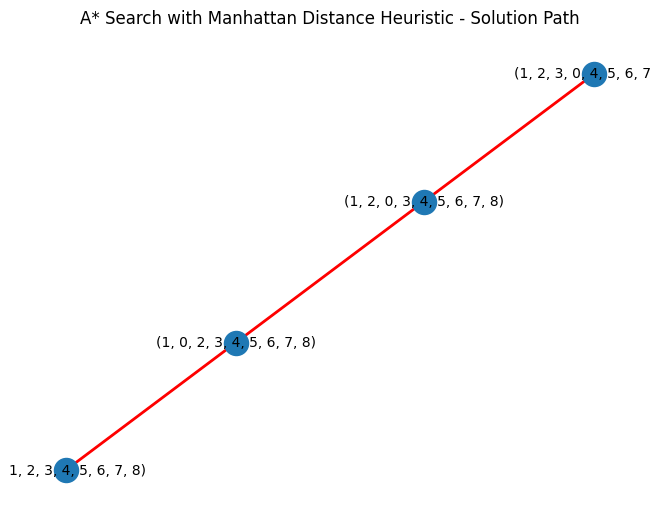

Time taken: 0.20862460136413574 seconds


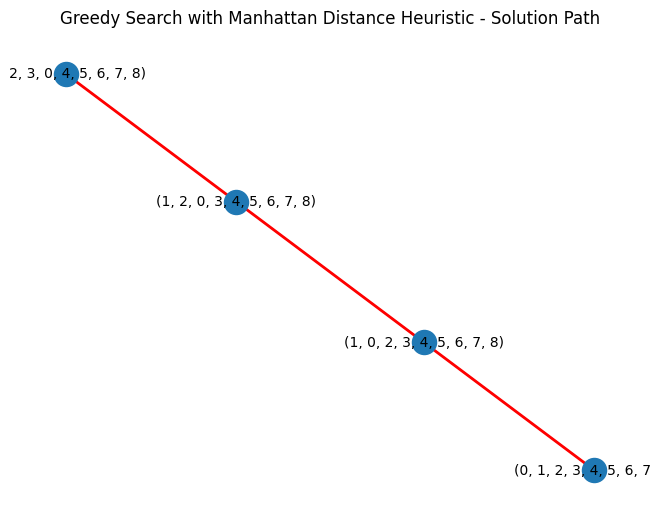

Time taken: 0.2149219512939453 seconds


In [11]:
import heapq
import time
import networkx as nx
import matplotlib.pyplot as plt

# Define the EightPuzzle class
class EightPuzzle:
    def __init__(self, initial_state):
        self.initial_state = initial_state

    def goal_test(self, state):
        # Implement your goal state test here
        return state == (0, 1, 2, 3, 4, 5, 6, 7, 8)  # Use a tuple for the goal state

    def get_successors(self, state):
        successors = []
        empty_tile_index = state.index(0)

        # Define the possible moves
        moves = [(1, 0), (-1, 0), (0, 1), (0, -1)]

        for move in moves:
            new_index = empty_tile_index + move[0]

            # Check if the new index is within bounds
            if 0 <= new_index < 9:
                new_state = list(state)  # Convert the state to a list to modify it
                new_state[empty_tile_index], new_state[new_index] = new_state[new_index], new_state[empty_tile_index]
                successors.append(tuple(new_state))  # Convert back to a tuple for consistency

        return successors

# Manhattan distance heuristic
def manhattan_distance(state):
    goal = (0, 1, 2, 3, 4, 5, 6, 7, 8)
    distance = 0

    for i in range(9):
        if state[i] != 0:
            goal_index = goal.index(state[i])
            goal_row, goal_col = divmod(goal_index, 3)
            current_row, current_col = divmod(i, 3)
            distance += abs(goal_row - current_row) + abs(goal_col - current_col)

    return distance

# A* search algorithm
def astar_search(problem, heuristic):
    # Implement your A* search algorithm here
    pass

# Greedy search algorithm
def greedy_search(problem, heuristic):
    # Implement your greedy search algorithm here
    pass

# ... (Rest of the code remains the same)

# Function to visualize the search process
def visualize_search(problem, heuristic, search_algorithm, search_name):
    G = nx.Graph()  # Create a graph for visualization
    closed_states = set()  # Initialize the closed states set

    start_state = tuple(problem.initial_state)  # Convert the initial state to a tuple
    open_states = [(0 + heuristic(start_state), start_state, None)]  # Include parent for visualization
    heapq.heapify(open_states)

    while open_states:
        f, state, parent_state = heapq.heappop(open_states)

        if parent_state is not None:
            G.add_edge(tuple(parent_state), state)  # Add an edge from parent to current state
        else:
            G.add_node(state)  # Add the initial state as a node

        if problem.goal_test(state):
            # Visualize the solution path
            path = nx.shortest_path(G, source=start_state, target=state)
            path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
            pos = nx.spring_layout(G)  # Position nodes using the spring layout
            nx.draw(G, pos, with_labels=True, node_size=200, node_color="lightblue", font_size=10, font_color="black")
            nx.draw(G, pos, edgelist=path_edges, width=2, edge_color="red")
            plt.title(f"{search_name} - Solution Path")
            plt.show()
            return

        if state in closed_states:
            continue
        closed_states.add(state)  # Add the state to closed states
        # Generate successors and add to the open list
        successors = problem.get_successors(state)
        for successor in successors:
            child_state = successor
            heapq.heappush(open_states, (heuristic(child_state) + len(closed_states), child_state, state))

# Function to run experiments with visualization
def run_experiments_with_visualization():
    initial_states = [
        [1, 2, 3, 0, 4, 5, 6, 7, 8],  # Sample instance
        # Add more initial states here
    ]

    for i, initial_state in enumerate(initial_states):
        eight_puzzle = EightPuzzle(initial_state)

        print(f"Experiment {i + 1} - Initial State: {initial_state}")

        # A* Search with Manhattan distance heuristic and visualization
        start_time = time.time()
        visualize_search(eight_puzzle, manhattan_distance, astar_search, "A* Search with Manhattan Distance Heuristic")
        end_time = time.time()
        print("Time taken:", end_time - start_time, "seconds")

        # Greedy Search with Manhattan distance heuristic and visualization
        start_time = time.time()
        visualize_search(eight_puzzle, manhattan_distance, greedy_search, "Greedy Search with Manhattan Distance Heuristic")
        end_time = time.time()
        print("Time taken:", end_time - start_time, "seconds")

        # ... Repeat for other heuristics and search methods

        print("=" * 40)

# Run the experiments with visualization
run_experiments_with_visualization()
